In [1]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

Using TensorFlow backend.


Initialized TensorFlow


### Fixed single Boston experiment for all dataset as points

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [43]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [62]:
repetitions = 20
Ns = [int(t) for t in np.linspace(100, 400, 5)]
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 100


In [63]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 100], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 1000, do_print = 'plot',
                                  reg_coeff = 0, reg_type = None)
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining data points
    #data = exp.get_inputs(len(exp.x_train) + len(exp.x_test))
    data = exp.x_train[0:1]

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 50000)

    return np.mean(rstd['experiment'] ** 2)


  0%|          | 0/5 [00:00<?, ?it/s]

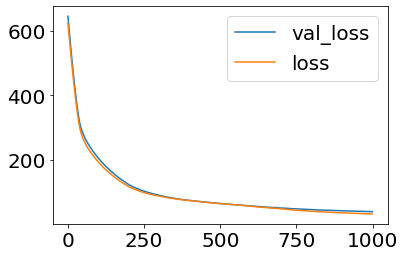

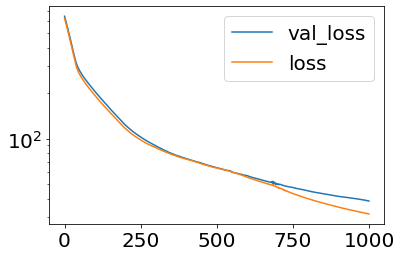

Loss: {'train': 3.534175714171759, 'test': 4.483496808070762}


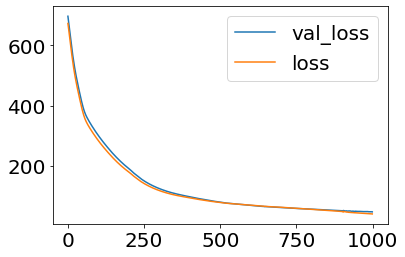

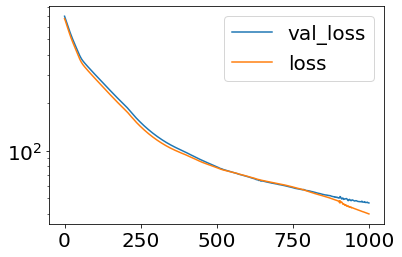

Loss: {'train': 3.963474432312616, 'test': 4.784666624256209}


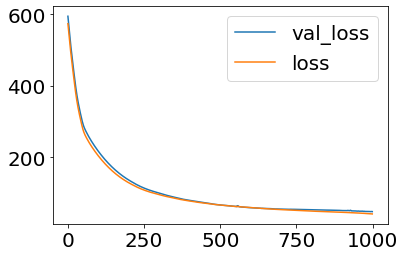

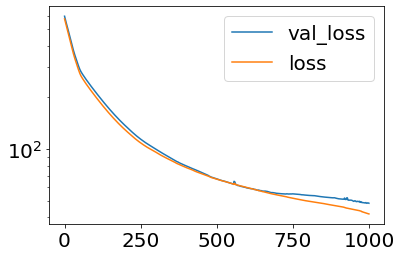

Loss: {'train': 4.11536290102666, 'test': 4.893097795224659}


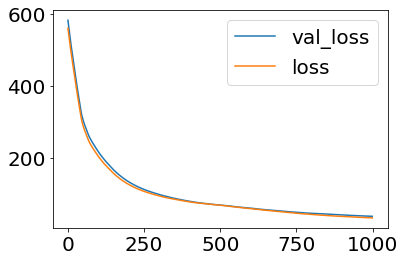

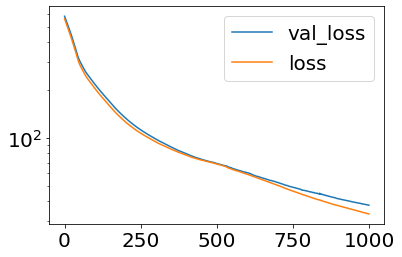

Loss: {'train': 3.6067058435761097, 'test': 4.311203315211277}


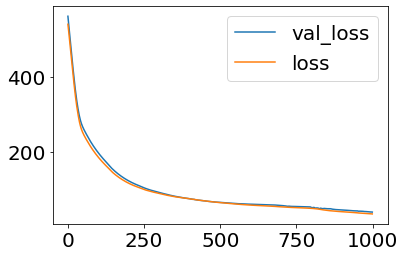

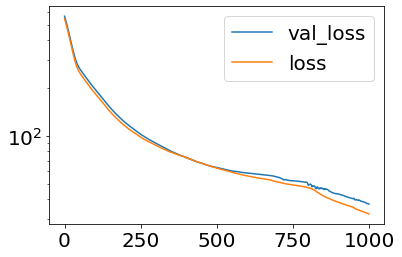

Loss: {'train': 3.523292625540554, 'test': 4.0396662749496155}


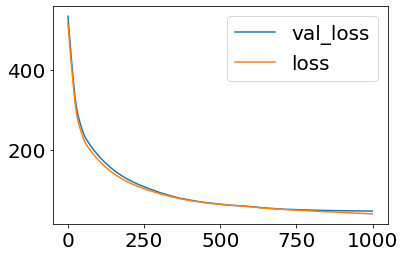

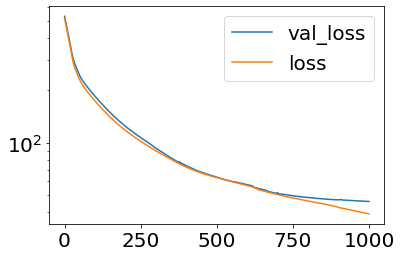

Loss: {'train': 3.9817234497259153, 'test': 4.767309953652176}


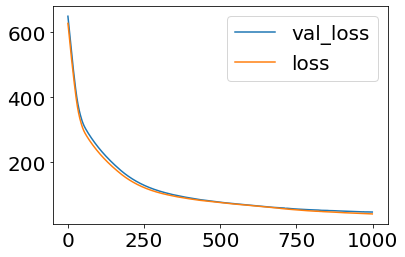

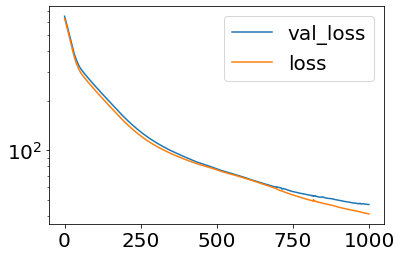

Loss: {'train': 4.089043958588403, 'test': 4.755144259508919}


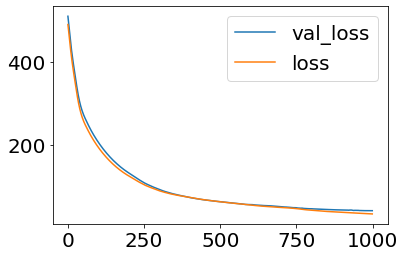

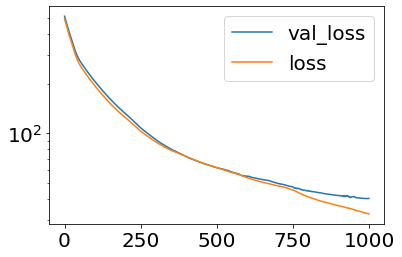

Loss: {'train': 3.7003649456666245, 'test': 4.56984416363286}


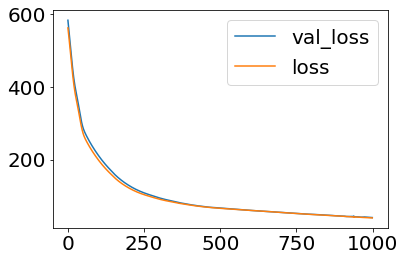

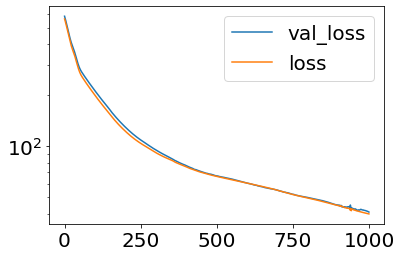

Loss: {'train': 3.8531645850379865, 'test': 4.610578133078183}


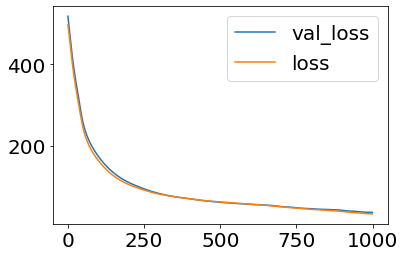

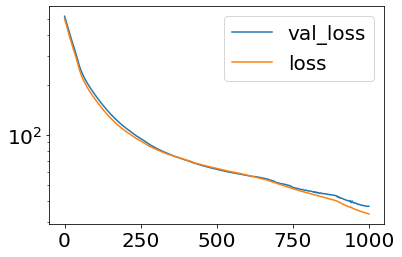

Loss: {'train': 3.699632734827476, 'test': 4.253419341293037}


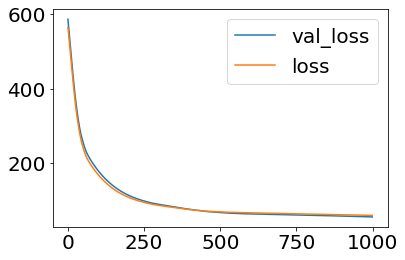

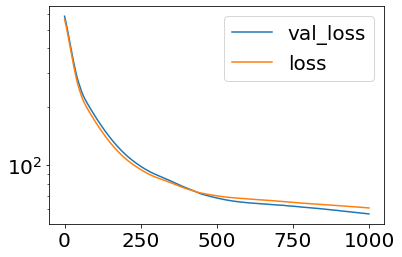

Loss: {'train': 5.273665199657478, 'test': 5.530260158987607}


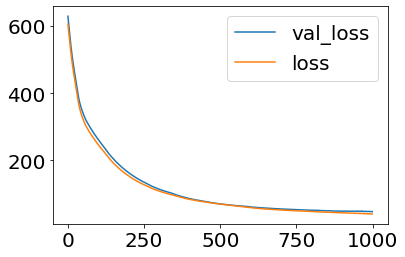

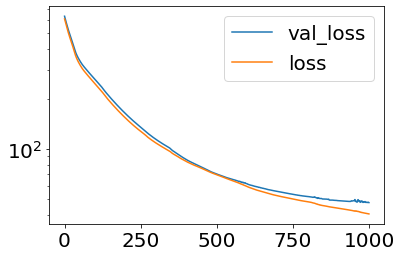

Loss: {'train': 4.129292378567233, 'test': 4.8187841303208305}


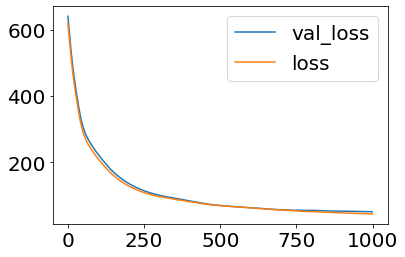

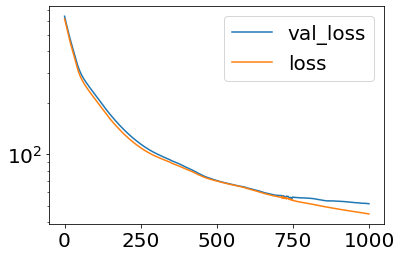

Loss: {'train': 4.511149910180876, 'test': 5.1569105727999816}


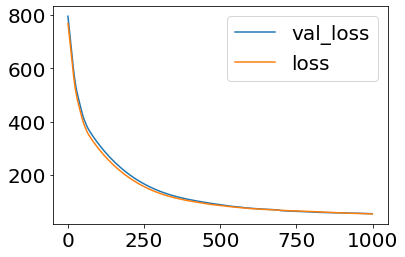

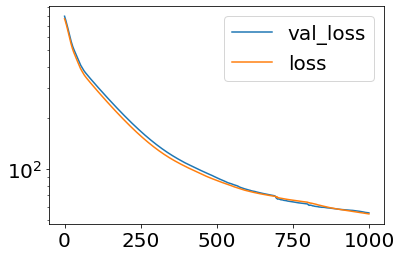

Loss: {'train': 4.797403507421512, 'test': 5.406537964764763}


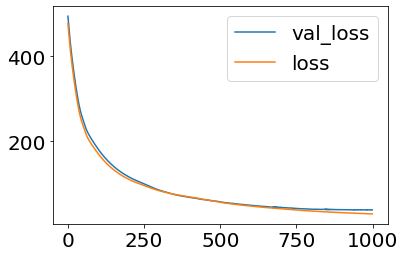

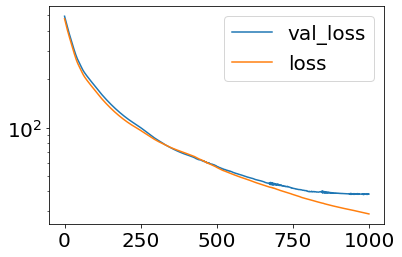

Loss: {'train': 3.4429362150702145, 'test': 4.301127224342497}


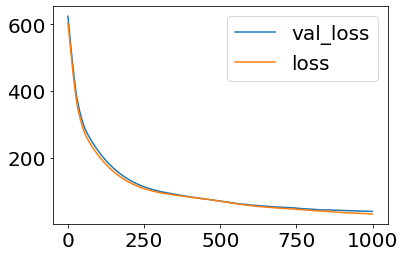

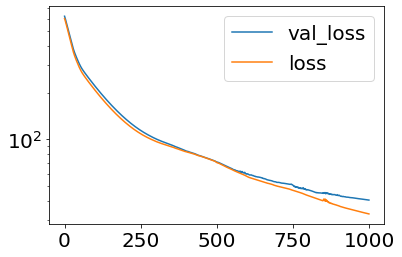

Loss: {'train': 3.6256346296555924, 'test': 4.60540413202024}


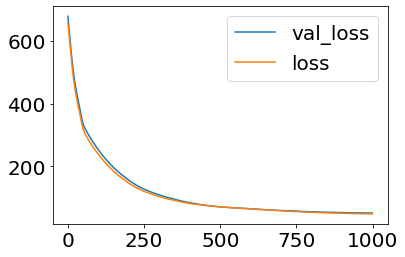

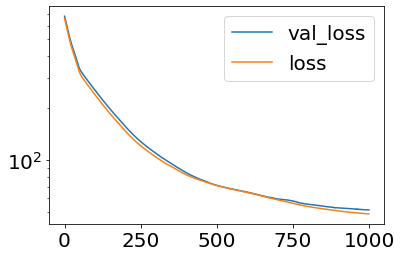

Loss: {'train': 4.644646427418926, 'test': 5.023760717055376}


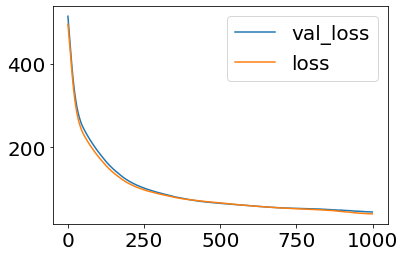

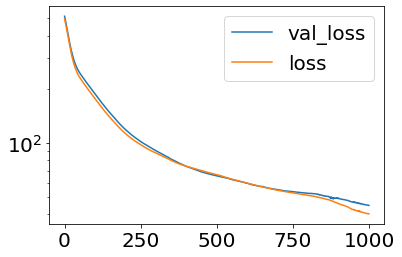

Loss: {'train': 4.087453244464232, 'test': 4.818318280986711}


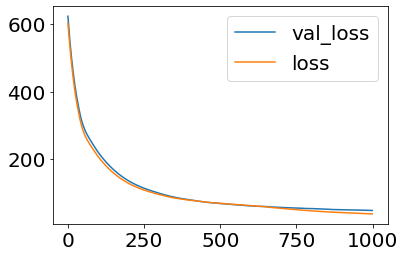

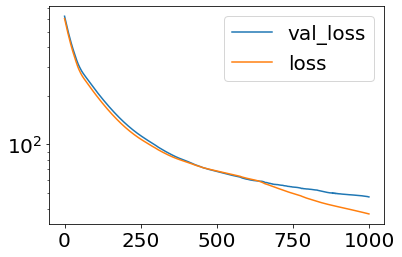

Loss: {'train': 3.8803269966994183, 'test': 4.73982411552878}


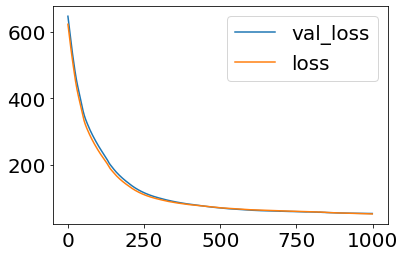

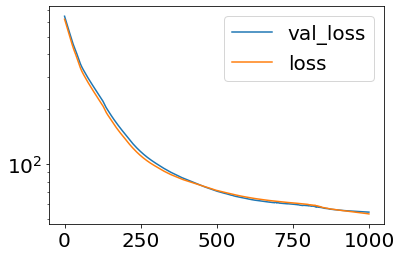

Loss: {'train': 4.8535256277216545, 'test': 5.352762564490823}



 20%|██        | 1/5 [01:19<05:18, 79.71s/it]

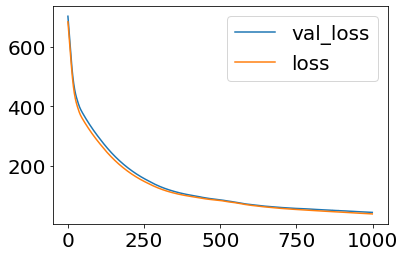

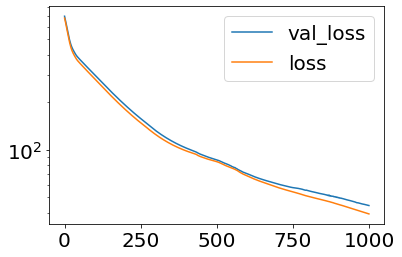

Loss: {'train': 3.8551447264038687, 'test': 4.677347377702302}


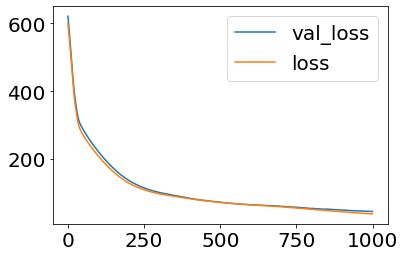

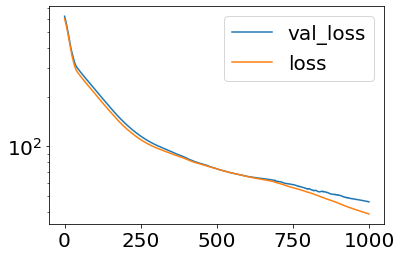

Loss: {'train': 3.829670508073108, 'test': 4.770553861879835}


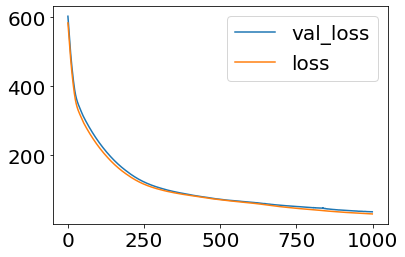

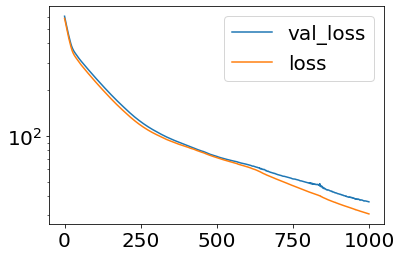

Loss: {'train': 3.286572548422483, 'test': 4.108919111887614}


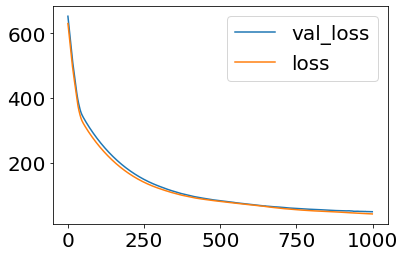

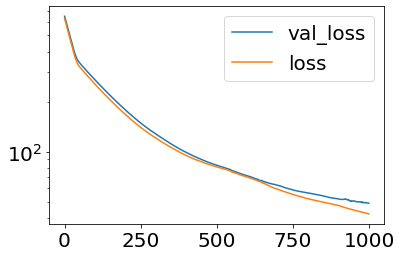

Loss: {'train': 4.010633930829492, 'test': 4.9354928521549}


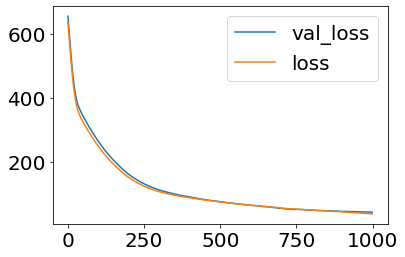

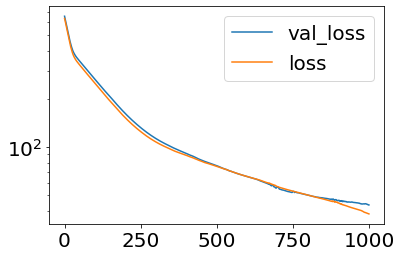

Loss: {'train': 3.8630498735031287, 'test': 4.542035596510943}


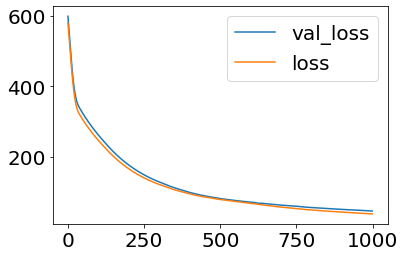

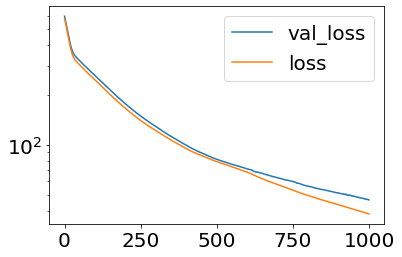

Loss: {'train': 3.792420353275715, 'test': 4.8876277848786005}


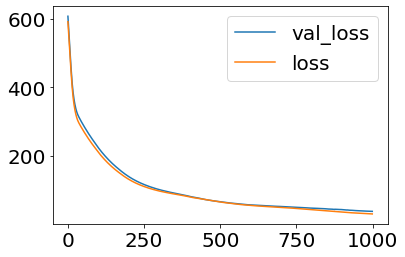

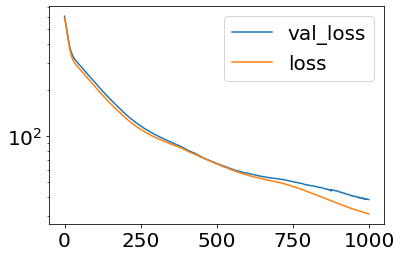

Loss: {'train': 3.3491601013901207, 'test': 4.297169898538029}


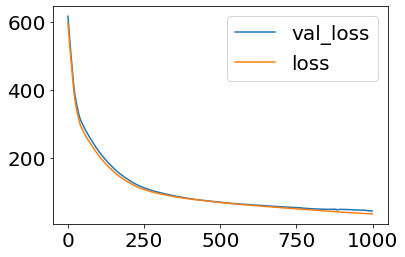

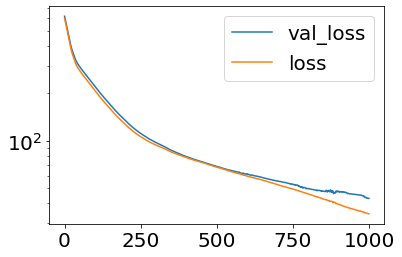

Loss: {'train': 3.612111900348474, 'test': 4.720085725597307}


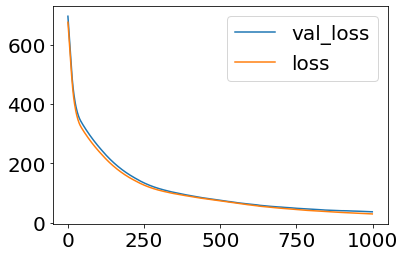

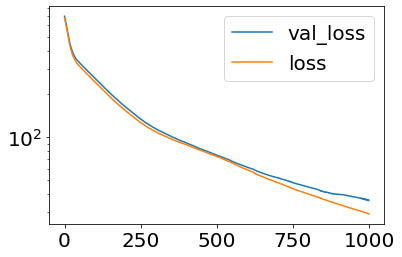

Loss: {'train': 3.1534036112303783, 'test': 4.126440556844076}


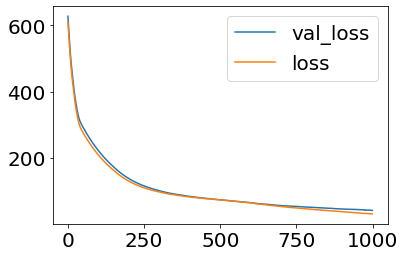

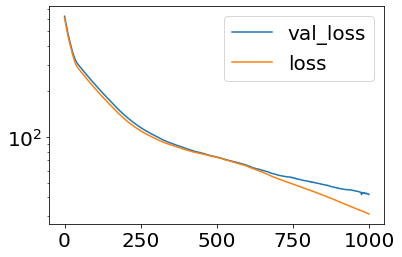

Loss: {'train': 3.3536022106019576, 'test': 4.374225459379309}


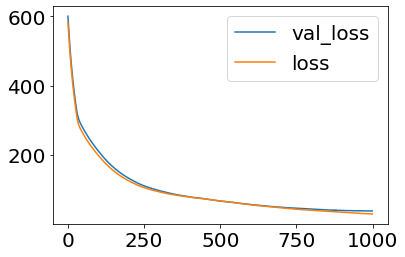

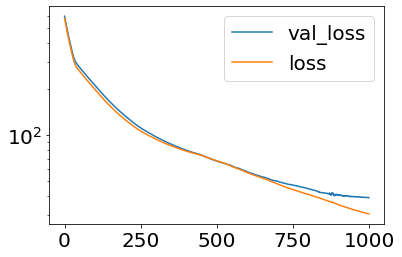

Loss: {'train': 3.439194324701139, 'test': 4.303819185144761}


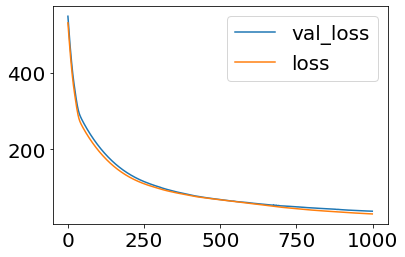

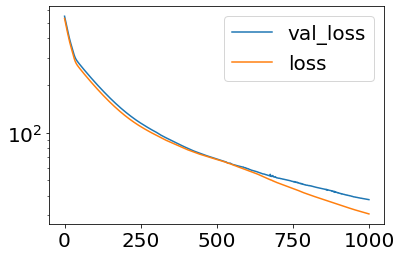

Loss: {'train': 3.3488863265160287, 'test': 4.45788361231486}


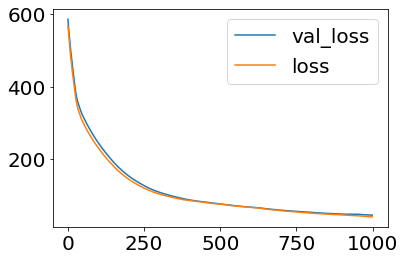

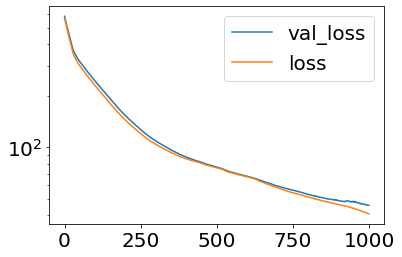

Loss: {'train': 3.9086079134799467, 'test': 4.703351454641305}


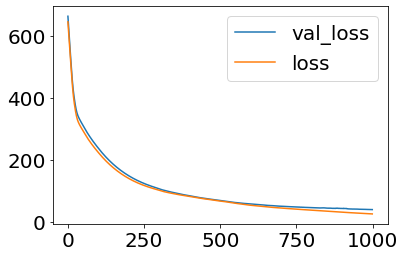

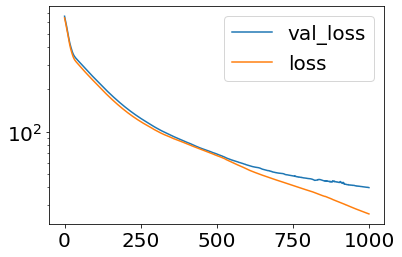

Loss: {'train': 2.931392481775567, 'test': 4.441496211407231}


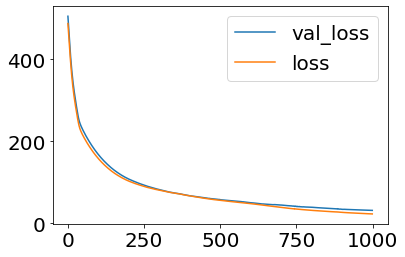

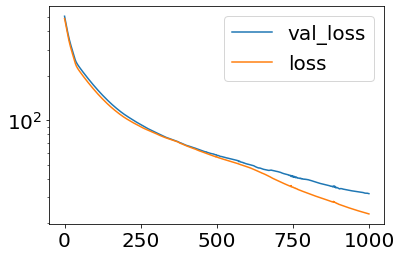

Loss: {'train': 3.014025140044713, 'test': 3.915180086622051}


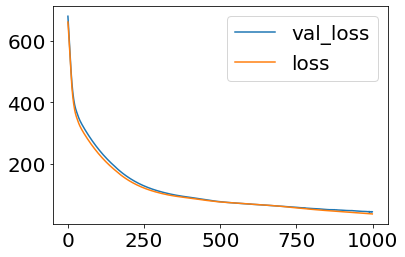

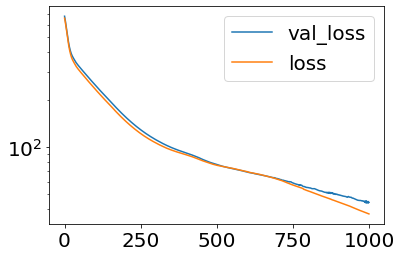

Loss: {'train': 3.6484796457951614, 'test': 4.576049000609154}


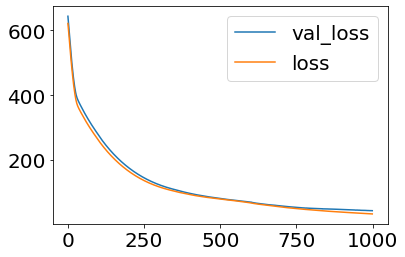

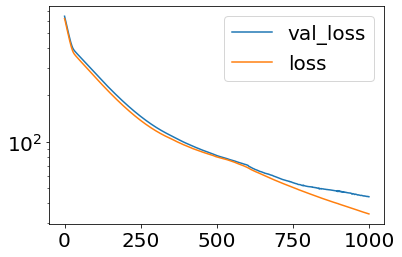

Loss: {'train': 3.3253059797947953, 'test': 4.654687576667936}


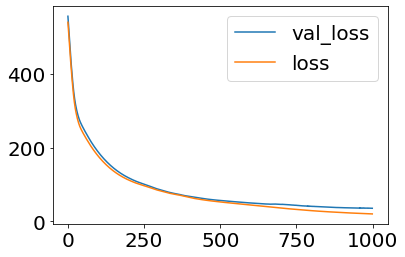

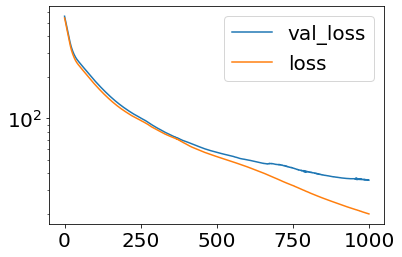

Loss: {'train': 2.505227463316209, 'test': 3.9445565335890826}


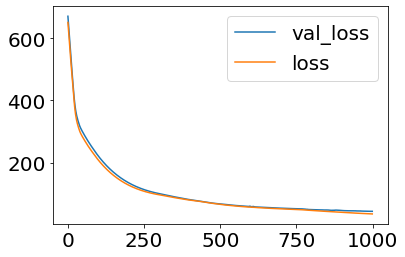

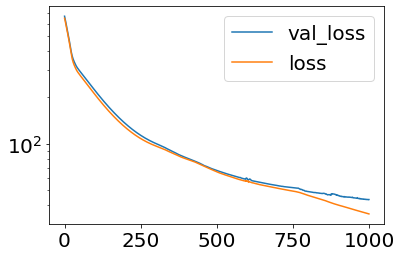

Loss: {'train': 3.7372182553357423, 'test': 4.536569849650066}


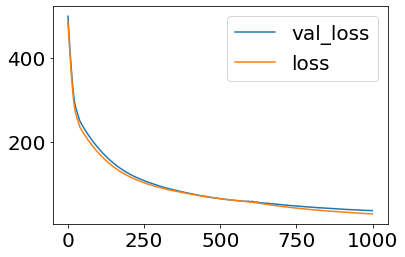

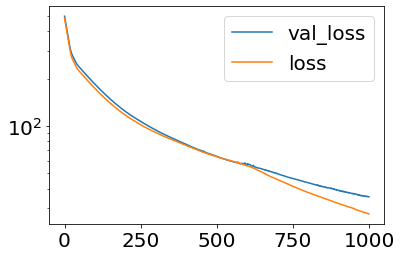

Loss: {'train': 3.09646643081514, 'test': 4.083511554493624}



 40%|████      | 2/5 [02:53<04:11, 83.79s/it]

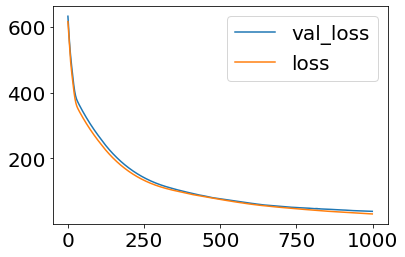

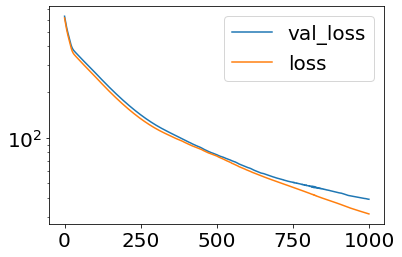

Loss: {'train': 3.168255272006044, 'test': 4.389279507655723}


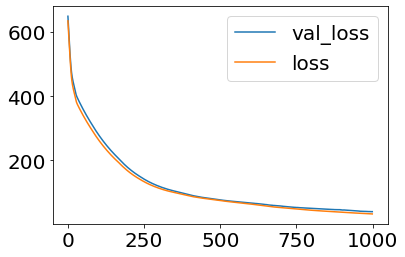

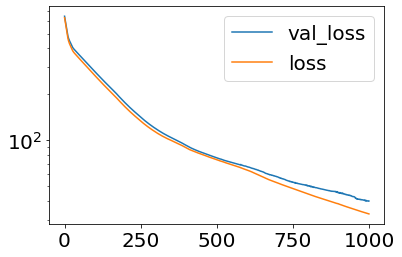

Loss: {'train': 3.3336081939168496, 'test': 4.357088678023395}


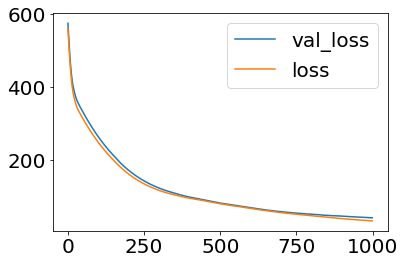

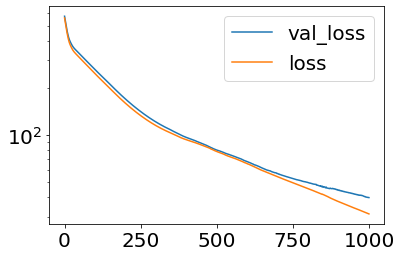

Loss: {'train': 3.130972900485048, 'test': 4.282832873101328}


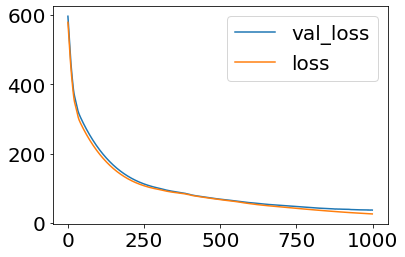

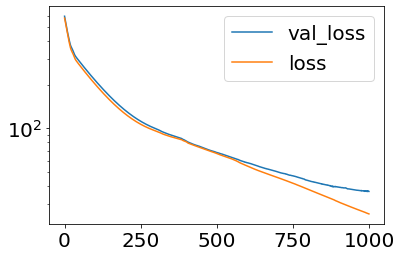

Loss: {'train': 2.8177896381604786, 'test': 4.178873739055558}


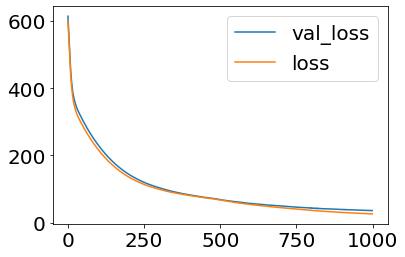

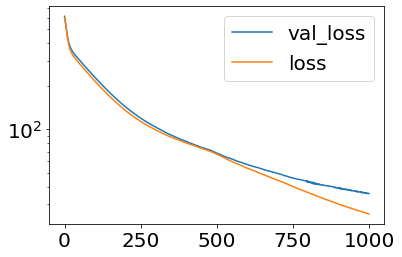

Loss: {'train': 2.856743892348639, 'test': 3.933200035843195}


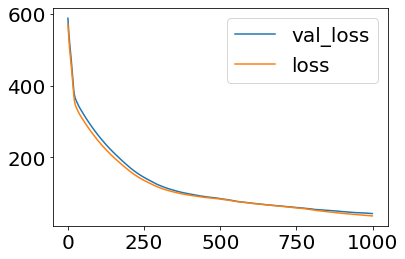

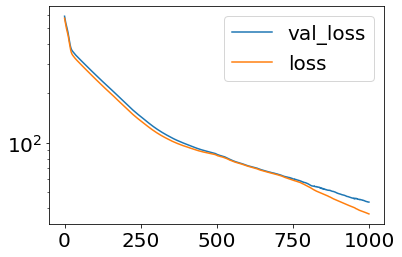

Loss: {'train': 3.6043746735789988, 'test': 4.53908530216591}


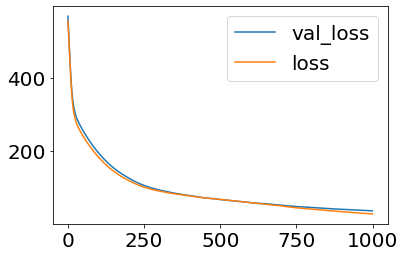

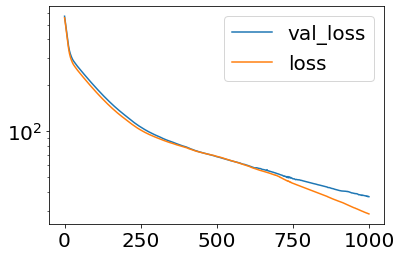

Loss: {'train': 3.202123916267169, 'test': 4.2658490012673775}


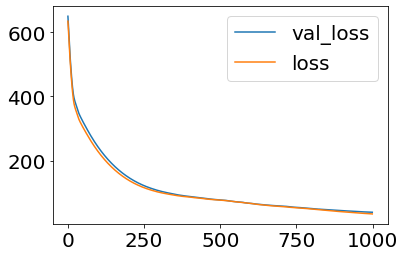

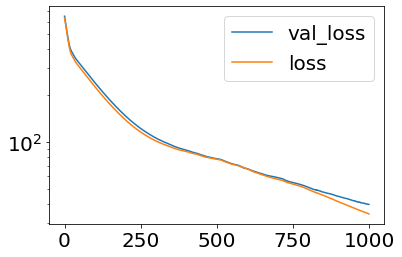

Loss: {'train': 3.4969307026060505, 'test': 4.254529107785693}


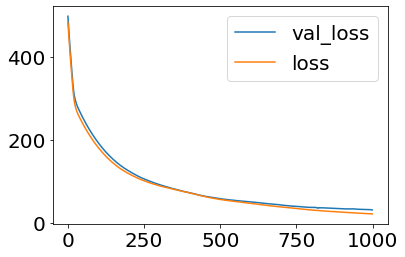

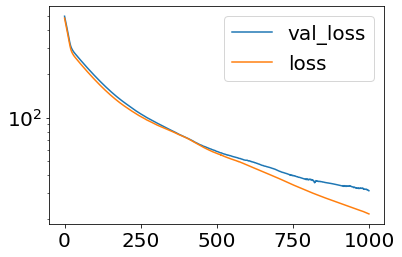

Loss: {'train': 2.6338615214470593, 'test': 3.766858803992178}


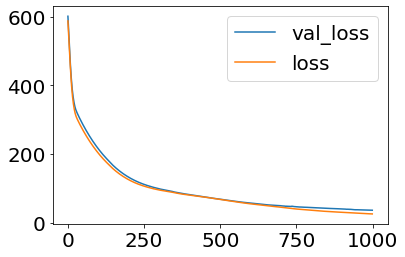

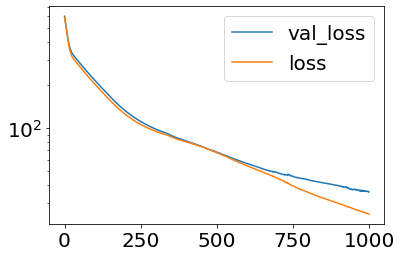

Loss: {'train': 2.8390756644824946, 'test': 4.0643708490857895}


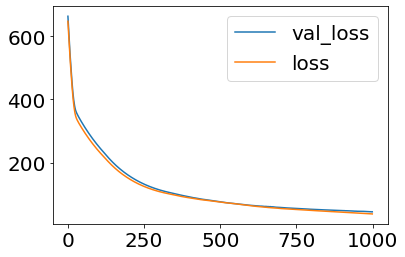

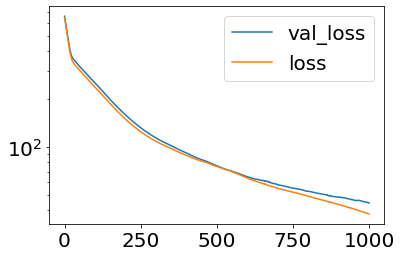

Loss: {'train': 3.814495517711828, 'test': 4.518817232169357}


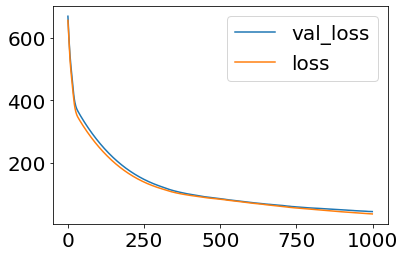

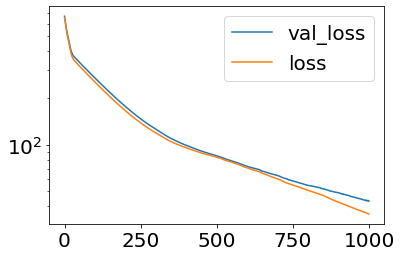

Loss: {'train': 3.4916626420351538, 'test': 4.3878703079971615}


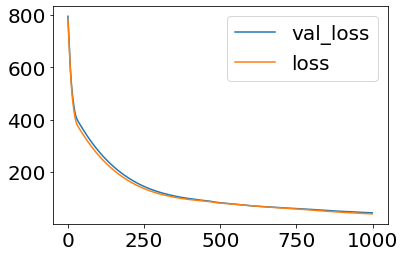

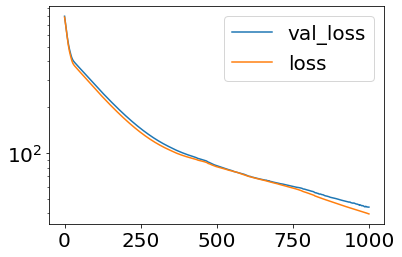

Loss: {'train': 3.8088839733954707, 'test': 4.448006111967797}


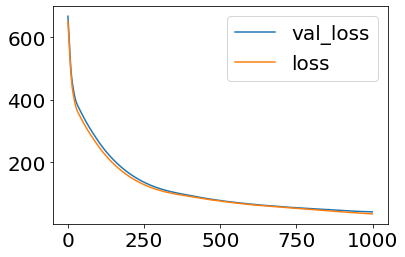

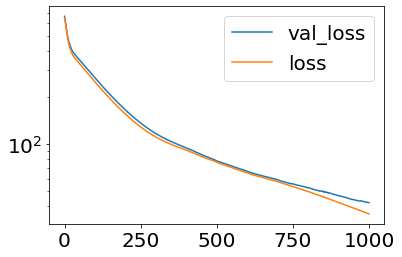

Loss: {'train': 3.5265173180268543, 'test': 4.335913484236774}


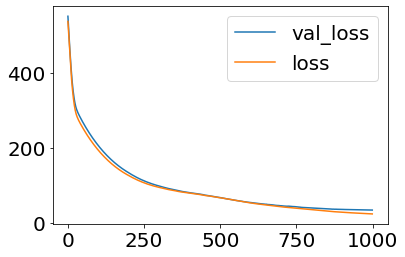

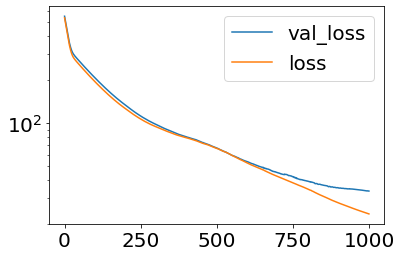

Loss: {'train': 2.644169174326528, 'test': 4.058033142837824}


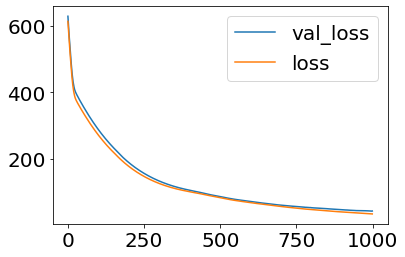

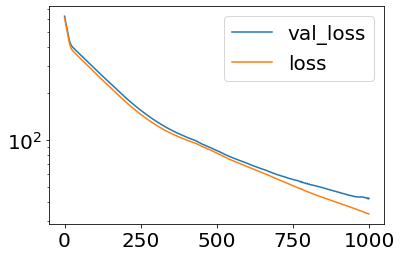

Loss: {'train': 3.268409845144441, 'test': 4.3476463991052965}


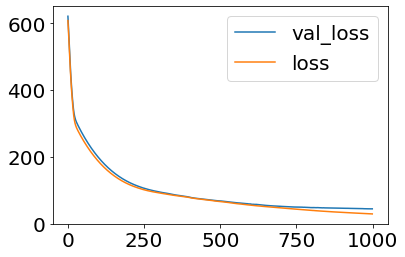

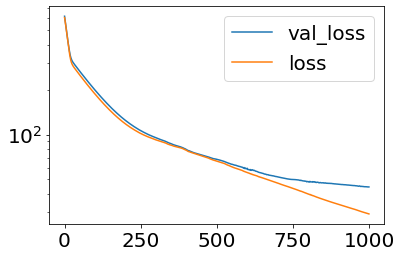

Loss: {'train': 3.219120501527692, 'test': 4.660152280096915}


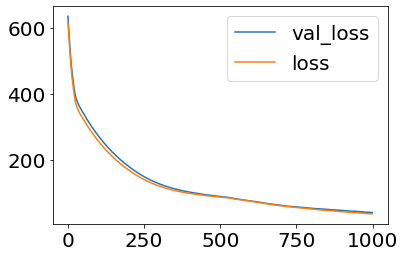

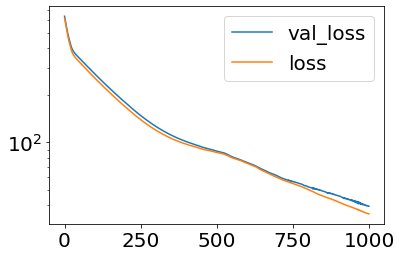

Loss: {'train': 3.3722390141817598, 'test': 4.162054536856857}


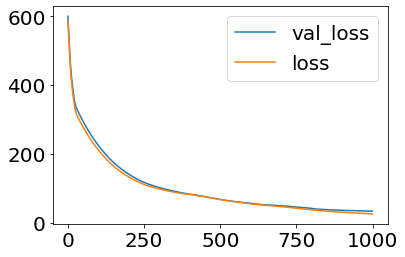

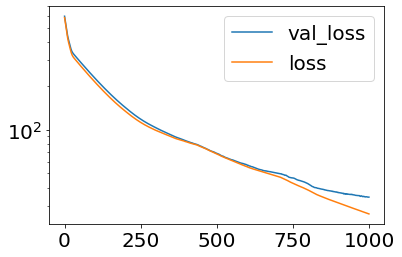

Loss: {'train': 3.0460841561308003, 'test': 3.967636218725467}


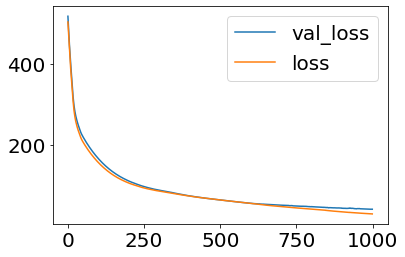

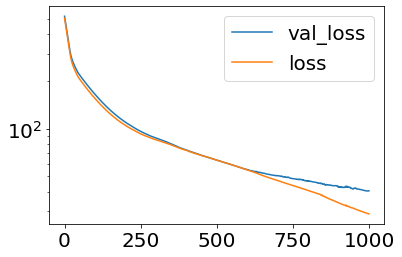

Loss: {'train': 3.1885875300605697, 'test': 4.319335748635086}



 60%|██████    | 3/5 [04:43<03:03, 91.76s/it]

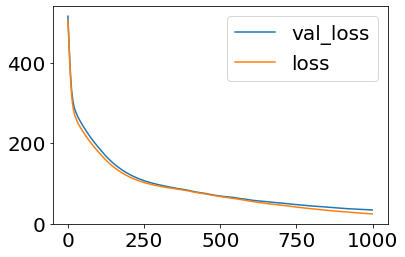

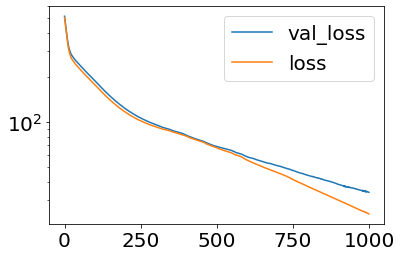

Loss: {'train': 2.6278890543644966, 'test': 3.9059825859817807}


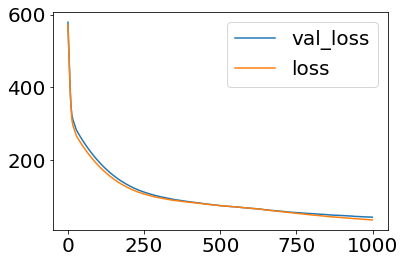

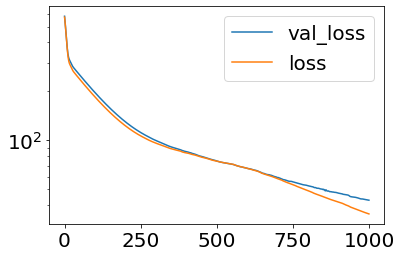

Loss: {'train': 3.547891917087064, 'test': 4.541599703770058}


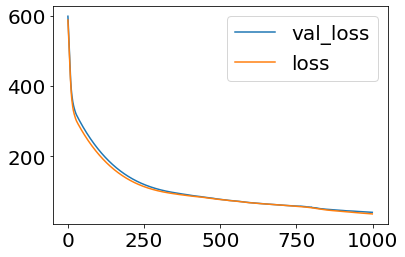

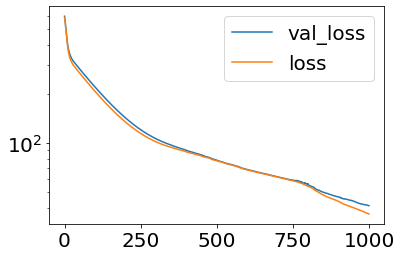

Loss: {'train': 3.60500691432764, 'test': 4.4058218544604735}


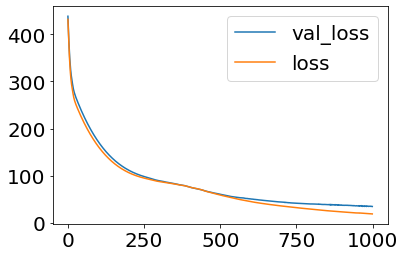

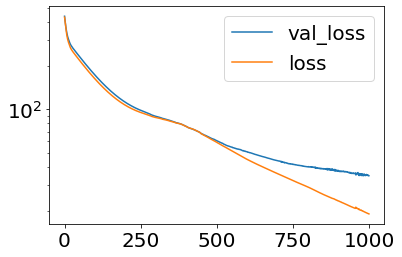

Loss: {'train': 2.357465671784807, 'test': 3.9334957889482083}


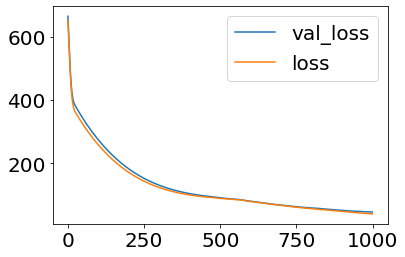

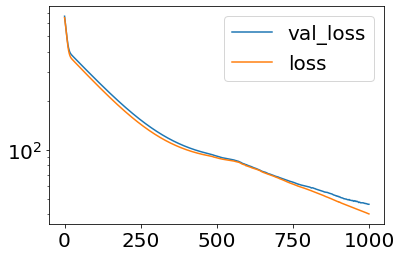

Loss: {'train': 3.595391259335055, 'test': 4.496310084473853}


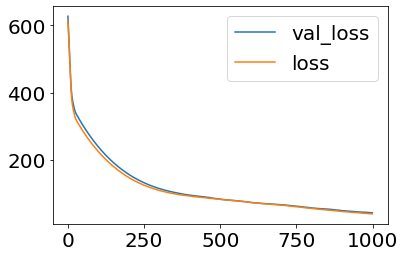

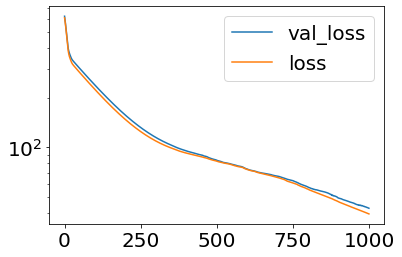

Loss: {'train': 3.641421422863951, 'test': 4.382537475286746}


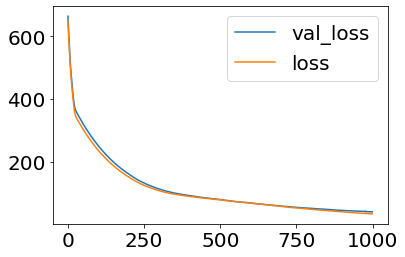

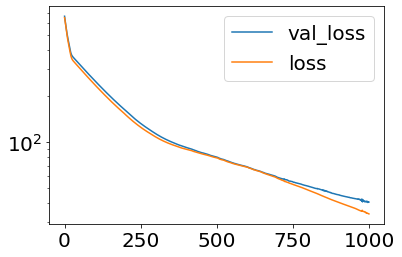

Loss: {'train': 3.3616101326328693, 'test': 4.398535773333381}


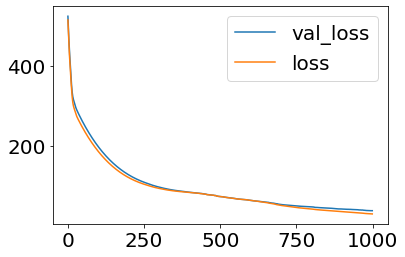

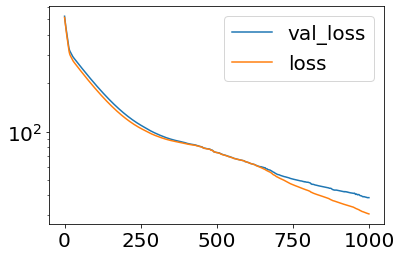

Loss: {'train': 3.2645120304409816, 'test': 4.315810141843908}


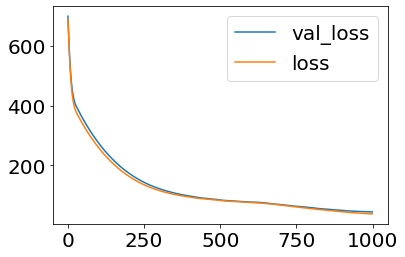

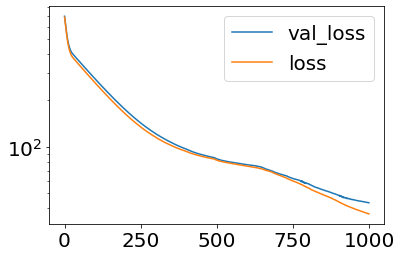

Loss: {'train': 3.5384885627444427, 'test': 4.643079439798991}


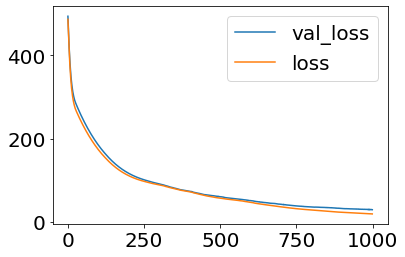

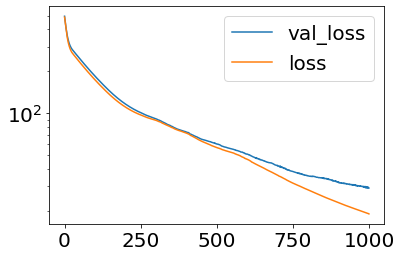

Loss: {'train': 2.287534812889477, 'test': 3.592026280421836}


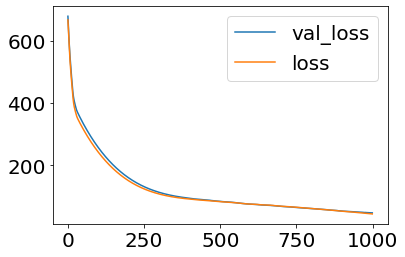

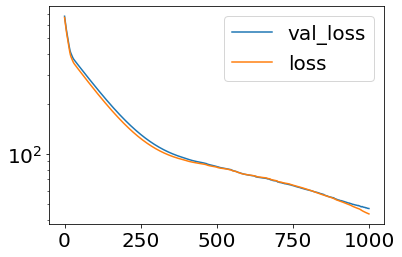

Loss: {'train': 3.9372404986088823, 'test': 4.714692171882181}


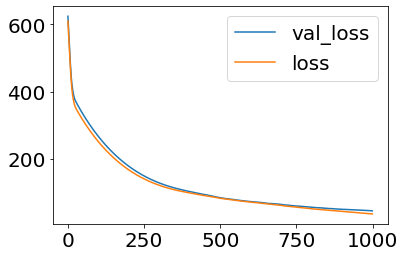

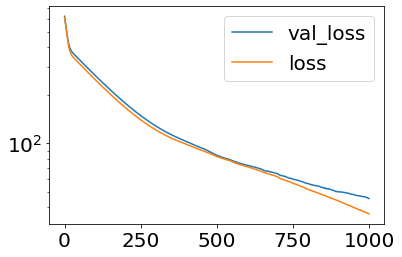

Loss: {'train': 3.3559437440173463, 'test': 4.545314639222389}


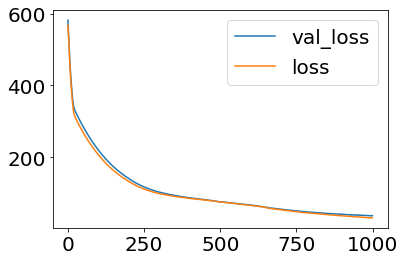

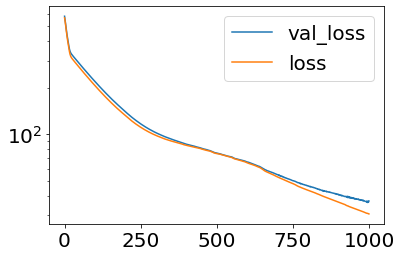

Loss: {'train': 3.0862016777000805, 'test': 4.07058364830765}


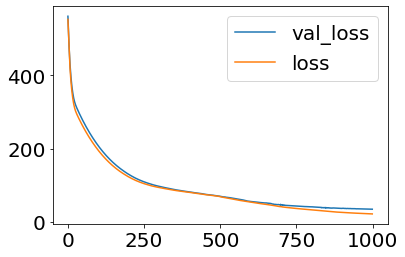

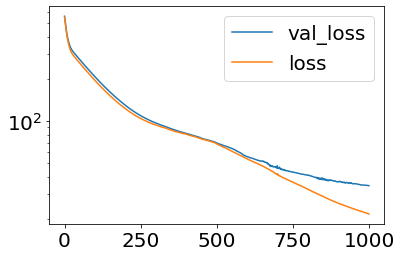

Loss: {'train': 2.423051942693125, 'test': 4.205808018703086}


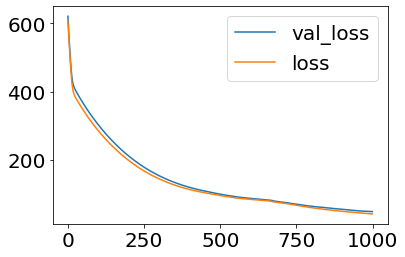

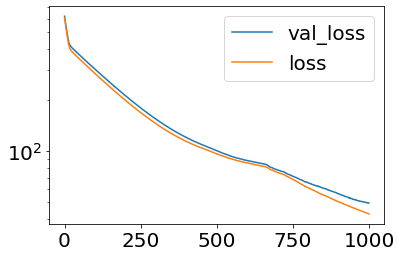

Loss: {'train': 3.6490041067104526, 'test': 4.691293937084722}


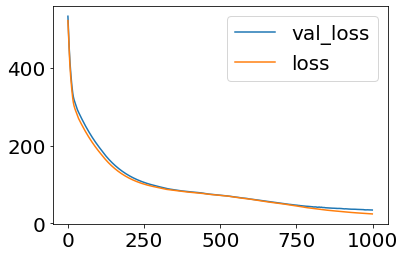

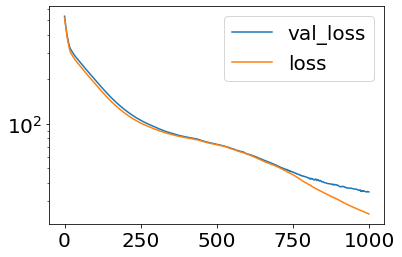

Loss: {'train': 2.731184957051041, 'test': 4.016727750441608}


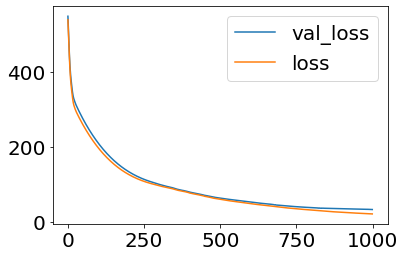

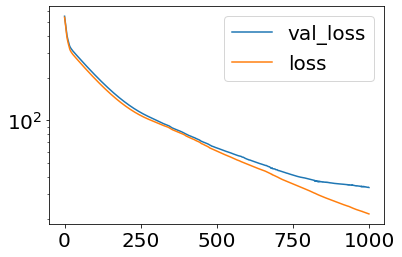

Loss: {'train': 2.4423961554423417, 'test': 3.9866807320538693}


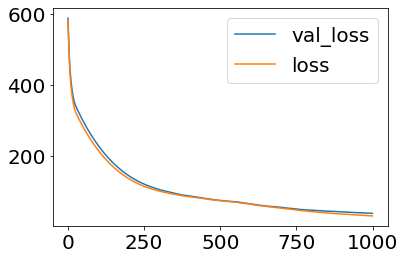

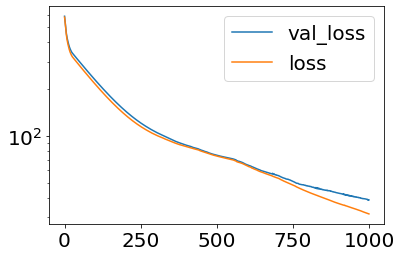

Loss: {'train': 3.2248864183331483, 'test': 4.340740768582214}


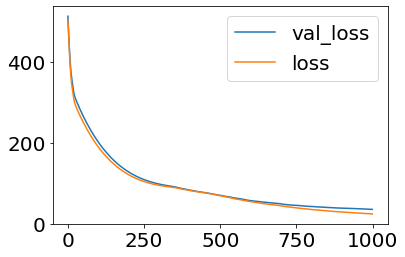

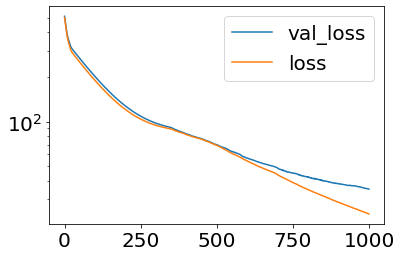

Loss: {'train': 2.6173054813158387, 'test': 4.234623688342525}


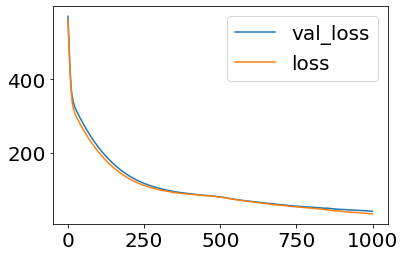

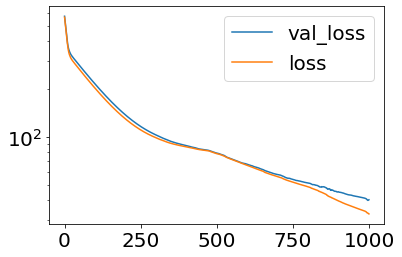

Loss: {'train': 3.401886932448586, 'test': 4.401172798755122}



 80%|████████  | 4/5 [06:48<01:41, 101.83s/it]

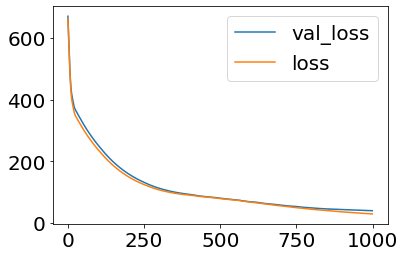

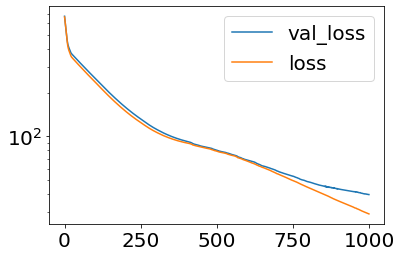

Loss: {'train': 2.9221846089504733, 'test': 4.287199532751944}


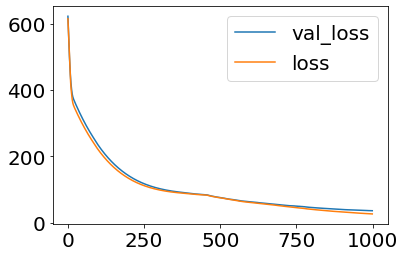

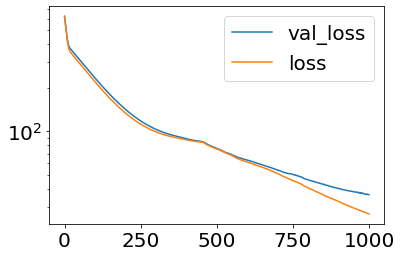

Loss: {'train': 2.8817962009127776, 'test': 4.089303429921469}


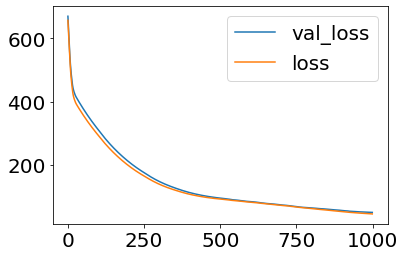

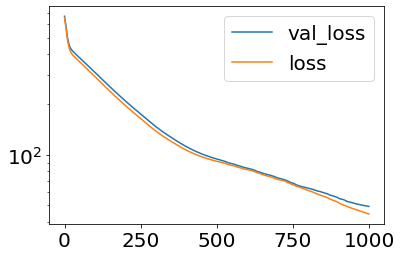

Loss: {'train': 3.8499801508270868, 'test': 4.66968095442828}


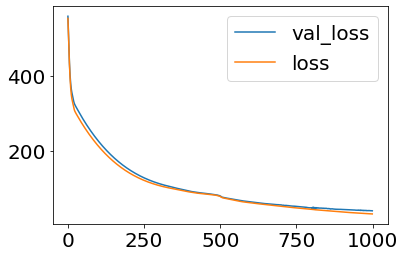

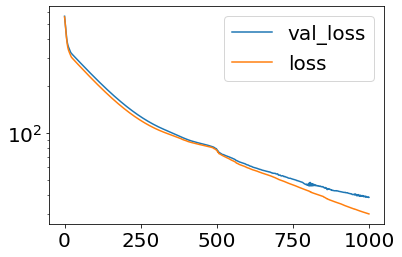

Loss: {'train': 3.1397143203433195, 'test': 4.194276562859031}


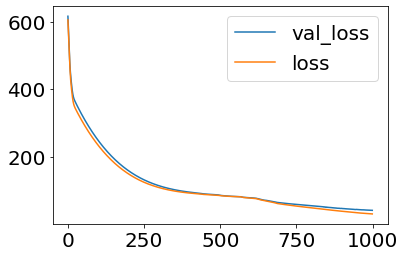

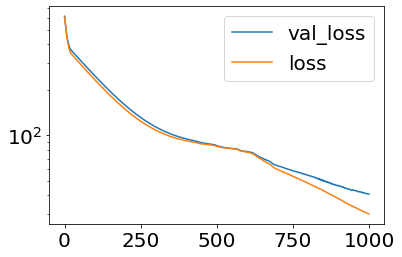

Loss: {'train': 2.9700454683587103, 'test': 4.297845874113196}


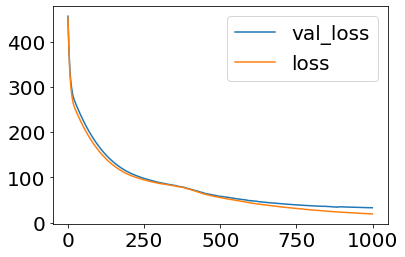

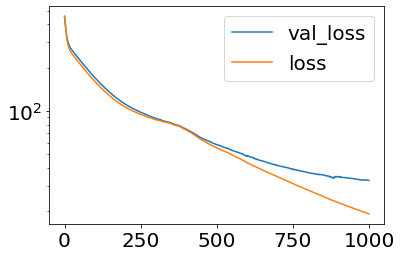

Loss: {'train': 2.292584250232961, 'test': 3.929325801250981}


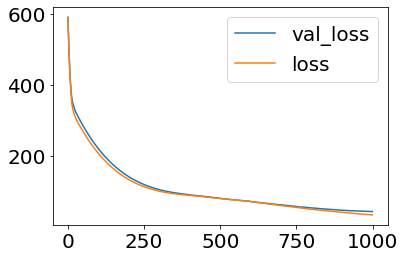

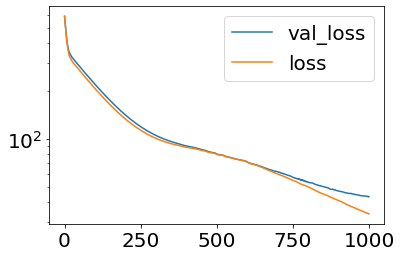

Loss: {'train': 3.367876209126841, 'test': 4.449695585288254}


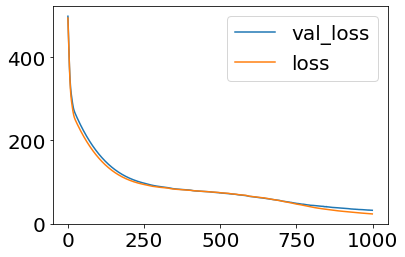

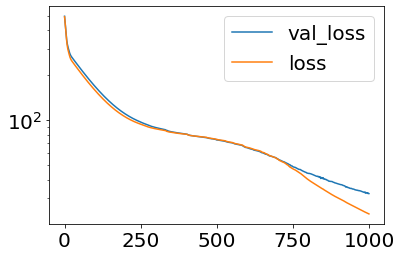

Loss: {'train': 2.6983080118009366, 'test': 3.710101194942699}


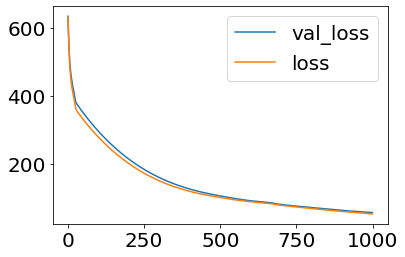

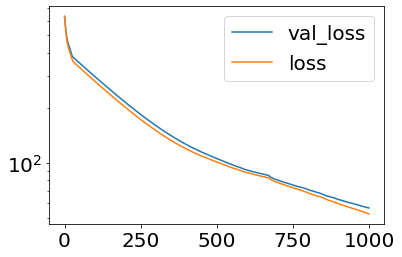

Loss: {'train': 4.273452110101681, 'test': 5.0867621926700375}


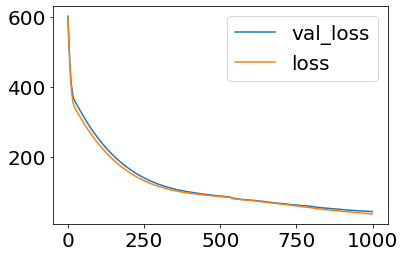

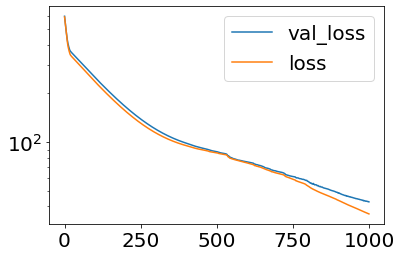

Loss: {'train': 3.3319345025732967, 'test': 4.36562520756441}


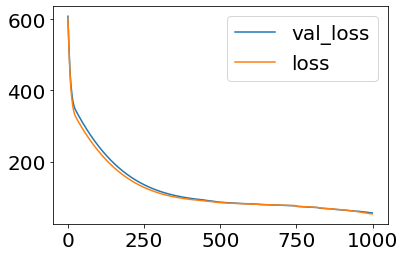

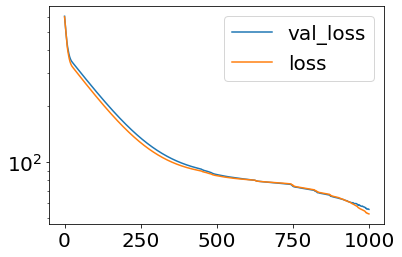

Loss: {'train': 4.573823904282976, 'test': 5.100390625000001}


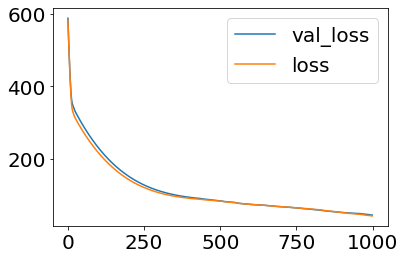

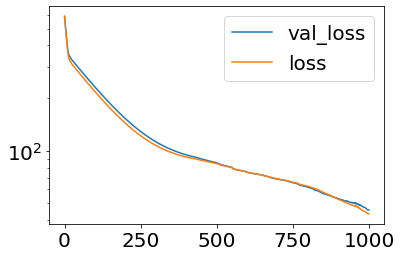

Loss: {'train': 3.9713907912226007, 'test': 4.6186294200373625}


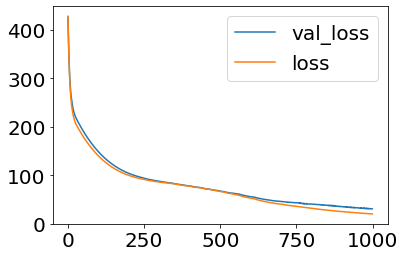

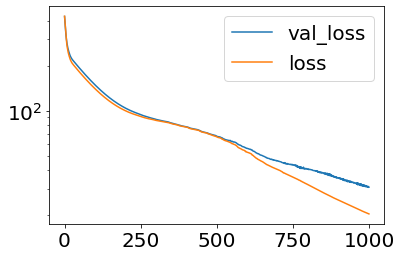

Loss: {'train': 2.4420020957984545, 'test': 3.9348592197193826}


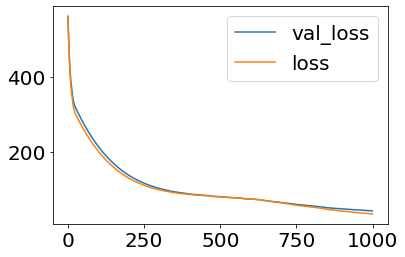

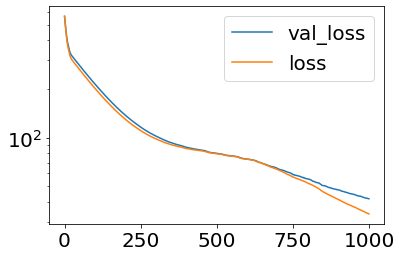

Loss: {'train': 3.3409388126713213, 'test': 4.424310315824023}


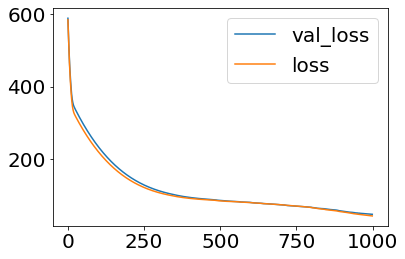

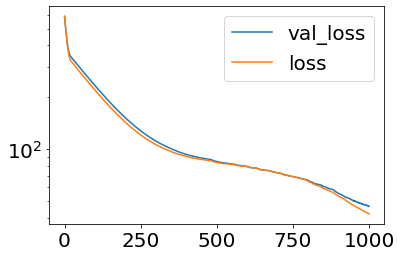

Loss: {'train': 3.944287564494822, 'test': 4.766698238896388}


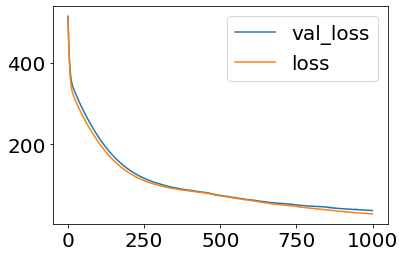

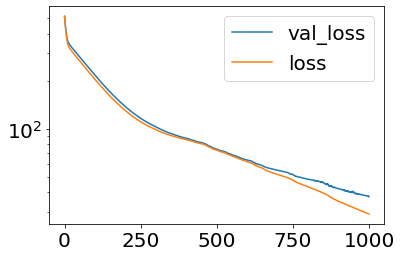

Loss: {'train': 2.9827358066445524, 'test': 4.20407450432871}


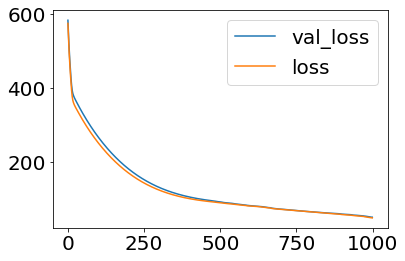

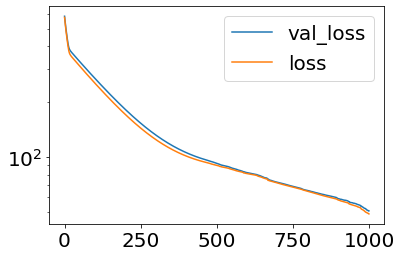

Loss: {'train': 4.009119939804077, 'test': 4.930711181491029}


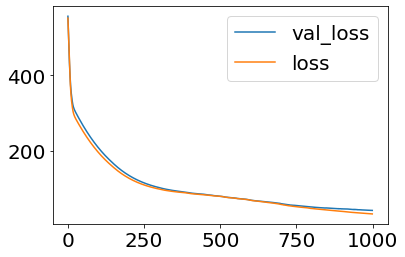

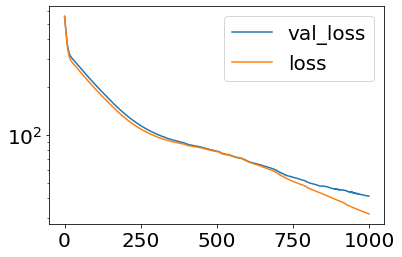

Loss: {'train': 3.2249870408879646, 'test': 4.564417517418955}


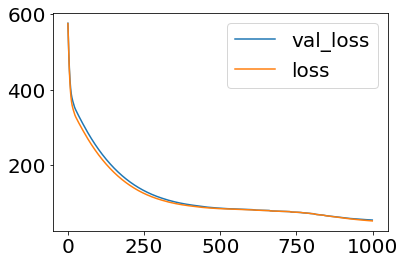

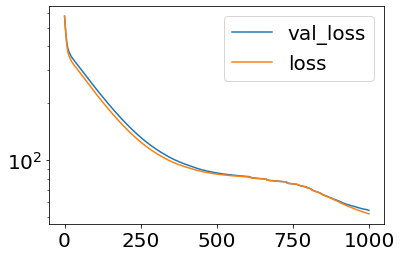

Loss: {'train': 4.50256732147519, 'test': 5.109160584094478}


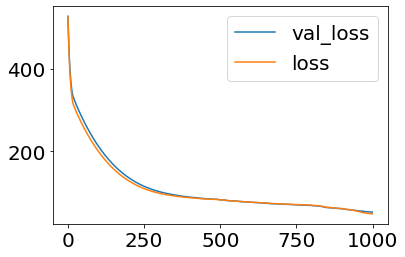

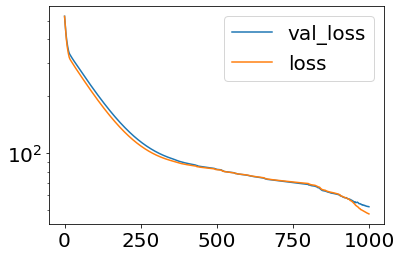

Loss: {'train': 4.288724210002635, 'test': 5.039294052124023}



100%|██████████| 5/5 [09:10<00:00, 110.15s/it]


In [64]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

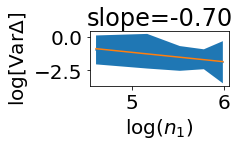

In [75]:
xs = np.log(Ns)
#xs = np.array(Ns)
mean = np.mean((results), axis = 1)
ys = np.log(mean)
ys_std = np.std(np.log(results), axis = 1) #/ len(results[0])

def line(x, a, b):
    return a * x + b
coeff = curve_fit(line, xs, ys)[0]

plt.figure(figsize=(2.5,1))
plt.xlabel('$\log(n_1)$')
#plt.xscale('log')
plt.ylabel('$\log[$Var$\Delta]$')
plt.title('slope=%.2f' % coeff[0])
plt.plot(xs, ys)
plt.plot(xs, line(xs, *coeff))
plt.fill_between(xs, ys - ys_std, ys + ys_std)
#plt.ylim(0,0.2)
plt.savefig('figures/comparison_architecture_boston.pdf', bbox_inches = 'tight')
plt.locator_params(axis='x', nbins=1)
plt.show()

In [65]:
# 1 repetition -> ok, decay
# more reps -> random stuff?